Question 2: Neural Network Model

In this question, a neural network classifier is used to identify confirmed
exoplanets from false positives using the Kepler dataset. The same dataset and
preprocessing pipeline used in Question 1 is applied here to ensure a fair and
consistent comparison between traditional machine learning models and a neural
network approach.


In [2]:
import sys, pandas as pd
from importlib import reload
import kagglehub
!rm -rf /content/up2115556-machine-learning-and-neural-network-coursework-2 # ensures a clean cell (this was a massive issue over and over)
!git clone https://github.com/up2115556/up2115556-machine-learning-and-neural-network-coursework-2.git #clones the repository
sys.path.insert(0, "/content/up2115556-machine-learning-and-neural-network-coursework-2")
from helpers.functions import prepare_kepler_data, make_train_test_split
import helpers.functions as funcs
reload(funcs)
prepare_kepler_data = funcs.prepare_kepler_data
make_train_test_split = funcs.make_train_test_split
#downloads the kepler dataset
path = kagglehub.dataset_download("nasa/kepler-exoplanet-search-results")
df = pd.read_csv(f"{path}/cumulative.csv")
#preps the data
X, y = prepare_kepler_data(df)
X_train_scaled, X_test_scaled, y_train, y_test, scaler = make_train_test_split(X, y)

Cloning into 'up2115556-machine-learning-and-neural-network-coursework-2'...
remote: Enumerating objects: 60, done.
remote: Counting objects: 100% (60/60), done.
remote: Compressing objects: 100% (56/56), done.
remote: Total 60 (delta 19), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (60/60), 26.05 KiB | 6.51 MiB/s, done.
Resolving deltas: 100% (19/19), done.


100%|██████████| 1.16M/1.16M [00:00<00:00, 26.9MB/s]

Extracting files...


Neural Network

A feedforward neural network is used for this task. The model consists of two hidden
layers with ReLU activation functions, followed by a sigmoid-activated output layer.
This architecture allows the model to learn non-linear relationships between the
input features and the target label, which may not be captured by traditional
linear models.

In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# define neural network architecture
model = Sequential([
    Dense(64, activation="relu", input_shape=(X_train_scaled.shape[1],)),
    Dense(32, activation="relu"),
    Dense(1, activation="sigmoid")])
# compile model with binary cross-entropy loss
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss="binary_crossentropy",
    metrics=["accuracy"])
# convert labels to numpy integer type for tensorflow compatibility
y_train = y_train.astype("int32").values
y_test = y_test.astype("int32").values
# train neural network
history = model.fit(
    X_train_scaled,
    y_train,
    epochs=20,
    batch_size=32,
    validation_split=0.2,
    verbose=1)
# evaluate model on test data
y_pred_nn = (model.predict(X_test_scaled) > 0.5).astype(int)
print("neural network")
print("confusion matrix:")
print(confusion_matrix(y_test, y_pred_nn))
print("\nclassification report:")
print(classification_report(y_test, y_pred_nn))
print("accuracy:", accuracy_score(y_test, y_pred_nn))


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
192/192 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7102 - loss: 0.5080 - val_accuracy: 0.8707 - val_loss: 0.2658
Epoch 2/20
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9087 - loss: 0.2237 - val_accuracy: 0.8766 - val_loss: 0.2556
Epoch 3/20
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8991 - loss: 0.2239 - val_accuracy: 0.8857 - val_loss: 0.2388
Epoch 4/20
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9065 - loss: 0.2120 - val_accuracy: 0.8916 - val_loss: 0.2342
Epoch 5/20
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9144 - loss: 0.1985 - val_accuracy: 0.8942 - val_loss: 0.2297
Epoch 6/20
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9151 - loss: 0.1997 - val_accuracy: 0.8994 - val_loss: 0.2285
Epoch 7/20
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9183 - loss: 0.1934 - val_accuracy: 0.8955 - val_loss: 0.2250
Epoch 8/20
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9164 - loss: 0.1986 - val_accuracy: 0.

Neural Network Performance

The neural network achieves an overall accuracy of approximately 91% on the test set.
It demonstrates strong recall for confirmed exoplanets, correctly identifying 88% of
real planets. This indicates that the model is highly sensitive to planetary signals
and is effective at detecting true exoplanets.

However, the precision is slightly lower than that of the Random Forest model, meaning
that a greater number of false positives are produced. This trade-off reflects the
neural network’s tendency to prioritise recall over precision.


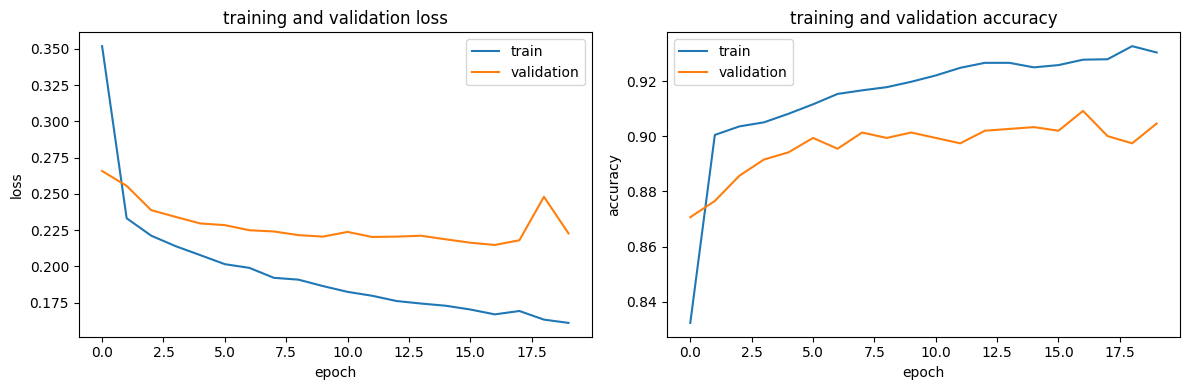

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend(["train", "validation"])
plt.title("training and validation loss")
plt.subplot(1,2,2)
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend(["train", "validation"])
plt.title("training and validation accuracy")
plt.tight_layout()
plt.show()


Training Behaviour

During training, both training and validation accuracy increase steadily and converge
to similar values. This indicates that the neural network is learning meaningful
patterns from the data and generalises well to unseen samples. The validation loss
decreases and stabilises over time, suggesting that overfitting is minimal and the
chosen network capacity is appropriate for the dataset.


Comparison with Traditional Machine Learning Models

Compared to the traditional machine learning models used in Question 1, the neural
network achieves comparable overall accuracy. While the Random Forest model provides
higher precision and fewer false positives, the neural network achieves the highest
recall, detecting the largest proportion of confirmed exoplanets.

This demonstrates that neural networks can effectively model complex feature
relationships, although for structured tabular data such as this dataset, traditional
machine learning methods remain competitive.

Conclusion

The neural network model performs well on the Kepler exoplanet classification task,
achieving strong generalisation performance and high recall for confirmed planets.
While it does not significantly outperform the Random Forest model in terms of
accuracy, it offers an alternative approach that prioritises sensitivity to real
planetary detections. Overall, this highlights the strengths and limitations of neural
networks when applied to structured astronomical data.
